In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# OBTENER EL DATASET

In [1]:
from datetime import date, timedelta
import pandas as pd
from binance import Client
import os

# Obtener la fecha de hoy y de ayer
today = date.today()
yesterday = today - timedelta(days=1)

# Crear la carpeta "Data" si no existe
output_folder = "Data"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def criptodata(dataticker):
    # Claves de la API de Binance
    api_key = "91f7175f-e6fa-4099-8626-20a408f818ab"
    api_secret = "tu contraseña secreta de key entre comillas"
    # Se saca en: https://testnet.binance.vision/
    client = Client(api_key, api_secret)
    
    # Obtener el precio actual del símbolo
    price = client.get_symbol_ticker(symbol=dataticker)
    print(price)
    
    # Configurar los parámetros para obtener datos históricos
    asset = dataticker
    start = "2024.09.01"
    end = str(yesterday)
    timeframe = "1d"
    
    # Obtener datos históricos
    klines = client.get_historical_klines(asset, timeframe, start, end)
    
    # Verificar si hay datos antes de procesar
    if len(klines) > 0:
        df = pd.DataFrame(klines)
        df = df.iloc[:, :6]
        df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
        df = df.set_index("Date")
        df.index = pd.to_datetime(df.index, unit="ms")
        df = df.astype("float")
        print(df)
        
        # Definir la ruta completa del archivo en la carpeta "Data"
        file_path = os.path.join(output_folder, dataticker + ".csv")
        
        # Guardar los datos en un archivo CSV dentro de la carpeta "Data"
        df.to_csv(file_path, encoding='utf-8')
        print(f"Data extraction finished for {dataticker} and saved to {file_path} :)")
    else:
        print(f"No data found for {dataticker} in the given date range.")

# Inicializar el cliente de Binance
api_key = "91f7175f-e6fa-4099-8626-20a408f818ab"
api_secret = "tu contraseña secreta de key entre comillas"
client = Client(api_key, api_secret)

# Obtener la lista de todos los símbolos de trading
exchange_info = client.get_exchange_info()

# Filtrar los tickers que terminan en 'USDT'
tickers = [s['symbol'] for s in exchange_info['symbols'] if s['symbol'].endswith('USDT')]

# Iterar sobre los tickers y obtener los datos
for ticker in tickers:
    criptodata(ticker)


{'symbol': 'BTCUSDT', 'price': '64232.01000000'}
                Open      High       Low     Close       Volume
Date                                                           
2024-09-01  58974.00  59076.59  57201.00  57301.86  20705.15741
2024-09-02  57301.77  59425.69  57128.00  59132.13  22895.01461
2024-09-03  59132.12  59809.65  57415.00  57487.73  22828.18447
2024-09-04  57487.74  58519.00  55606.00  57970.90  35560.82146
2024-09-05  57970.90  58327.07  55643.65  56180.00  27806.91413
2024-09-06  56180.00  57008.00  52550.00  53962.97  54447.76826
2024-09-07  53962.97  54850.00  53745.54  54160.86  16694.04774
2024-09-08  54160.86  55318.00  53629.01  54869.95  16274.14779
2024-09-09  54869.95  58088.00  54591.96  57042.00  32384.51737
2024-09-10  57042.01  58044.36  56386.40  57635.99  23626.78126
2024-09-11  57635.99  57981.71  55545.19  57338.00  33026.56757
2024-09-12  57338.00  58588.00  57324.00  58132.32  31074.40631
2024-09-13  58132.31  60625.00  57632.62  60498.00  298

In [2]:
import os
import pandas as pd

# Definir la carpeta donde están los archivos CSV
carpeta_csv = r'C:\Users\magic\Desktop\Machine Learning\TP2\Data'

# Definir la ruta absoluta para guardar el archivo combinado
archivo_salida = r'C:\Users\magic\Desktop\Machine Learning\TP2\New_data.csv'

dfs = []

# Iterar sobre los archivos de la carpeta
for archivo in os.listdir(carpeta_csv):
    if archivo.endswith(".csv"):
        # Construir la ruta completa del archivo CSV
        ruta_csv = os.path.join(carpeta_csv, archivo)
        
        # Leer el archivo CSV y manejar posibles errores
        try:
            df = pd.read_csv(ruta_csv)
            
            # Verificar si las columnas esperadas están presentes
            if set(['Date', 'Open', 'High', 'Low', 'Close', 'Volume']).issubset(df.columns):
                # Seleccionar solo las columnas deseadas
                df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
                
                # Agregar el nombre del archivo como primera columna
                df.insert(0, 'name', archivo)  # Insertar el nombre del archivo como una nueva columna
                
                # Agregar el DataFrame a la lista
                dfs.append(df)
            else:
                print(f"El archivo {archivo} no tiene las columnas esperadas.")
        except Exception as e:
            print(f"Error al procesar el archivo {archivo}: {e}")

# Verificar si se leyeron archivos correctamente
if dfs:
    # Combinar todos los DataFrames en uno solo
    df_combined = pd.concat(dfs, ignore_index=True)
    
    # Guardar el archivo combinado en la ruta absoluta
    try:
        df_combined.to_csv(archivo_salida, index=False)
        print(f"Todos los CSV han sido combinados y guardados en '{archivo_salida}'.")
    except Exception as e:
        print(f"Error al guardar el archivo combinado: {e}")
else:
    print("No se encontraron archivos CSV válidos para combinar.")


Todos los CSV han sido combinados y guardados en 'C:\Users\magic\Desktop\Machine Learning\TP2\New_data.csv'.


# PREPROCESAMINENTO DEL DATASET



In [25]:
#carga del dataset y muestreo de las primeras filas
import pandas as pd
data=pd.read_csv('New_data.csv')
print(df.head())

               name        Date      Open      High       Low     Close  \
0  1000SATSUSDT.csv  2024-09-01  0.000296  0.000302  0.000266  0.000270   
1  1000SATSUSDT.csv  2024-09-02  0.000270  0.000315  0.000265  0.000310   
2  1000SATSUSDT.csv  2024-09-03  0.000310  0.000318  0.000293  0.000294   
3  1000SATSUSDT.csv  2024-09-04  0.000294  0.000319  0.000275  0.000304   
4  1000SATSUSDT.csv  2024-09-05  0.000304  0.000318  0.000294  0.000301   

         Volume  
0  2.094033e+11  
1  3.432723e+11  
2  2.586038e+11  
3  3.832800e+11  
4  2.504755e+11  


In [26]:
#informacion general del dataset
print(data.info())
#estadisticas descriptivas
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9054 entries, 0 to 9053
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    9054 non-null   object 
 1   Date    9054 non-null   object 
 2   Open    9054 non-null   float64
 3   High    9054 non-null   float64
 4   Low     9054 non-null   float64
 5   Close   9054 non-null   float64
 6   Volume  9054 non-null   float64
dtypes: float64(5), object(2)
memory usage: 495.3+ KB
None
               Open          High           Low         Close        Volume
count  9.054000e+03  9.054000e+03  9.054000e+03  9.054000e+03  9.054000e+03
mean   3.579669e+02  3.649276e+02  3.512201e+02  3.591776e+02  6.797861e+10
std    4.299978e+03  4.381945e+03  4.222203e+03  4.316013e+03  1.064958e+12
min    7.700000e-07  8.000000e-07  7.600000e-07  7.700000e-07  1.289055e+01
25%    7.332500e-02  7.652500e-02  7.111250e-02  7.400250e-02  1.222001e+06
50%    3.456000e-01  3.587500e-01  3.340500e-0

In [27]:
#verificar si tenemos datos nulos o vacios
print(data.isnull().sum())

name      0
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [28]:
data.dtypes

name       object
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [29]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].mean(axis=0)

----------------------
Media de cada variable
----------------------


Open      3.579669e+02
High      3.649276e+02
Low       3.512201e+02
Close     3.591776e+02
Volume    6.797861e+10
dtype: float64

In [30]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Open      1.848981e+07
High      1.920144e+07
Low       1.782700e+07
Close     1.862797e+07
Volume    1.134136e+24
dtype: float64

In [31]:
#Prueba de normalidad
#Ho: la variable se aproxima a una distribución normal
#Ha: la variable no se aproxima a una distribución normal

In [33]:
ss.shapiro(data.Open)

c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9054.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.054414371032436515, pvalue=6.121719914564037e-111)

In [34]:
ss.shapiro(data.Close)

c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9054.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.054405965983735594, pvalue=6.1184674457828224e-111)

In [35]:
ss.shapiro(data.High)

c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9054.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.05442796115684145, pvalue=6.126982543966923e-111)

In [36]:
ss.shapiro(data.Low)

c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9054.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.05438632005015642, pvalue=6.110871973445901e-111)

In [37]:
ss.shapiro(data.Volume)

c:\Users\magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9054.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.03706216485717406, pvalue=2.06153130089711e-111)

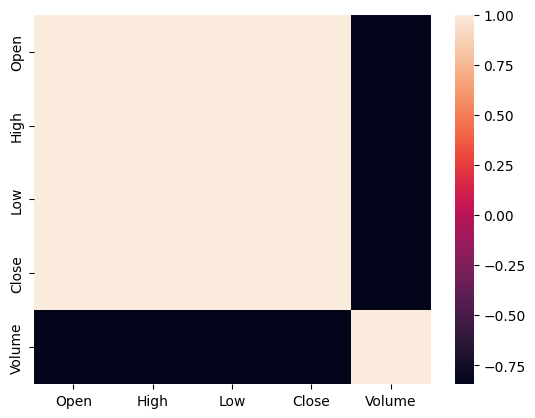

In [38]:
#Heatmap
sns.heatmap(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].corr(method = "spearman"))
plt.show()

In [39]:
data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].corr(method = "spearman")

,Open,High,Low,Close,Volume
Open,1.000000,0.999688,0.999917,0.999677,-0.844375
High,0.999688,1.000000,0.999689,0.999900,-0.841317
Low,0.999917,0.999689,1.000000,0.999778,-0.845043
Close,0.999677,0.999900,0.999778,1.000000,-0.842799
Volume,-0.844375,-0.841317,-0.845043,-0.842799,1.000000


In [40]:
from scipy.stats import bartlett

# Acceder a las columnas del DataFrame usando una lista de nombres de columnas
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data_columns = [data[col] for col in columns]

# Realizar la prueba de Bartlett entre las columnas
stat, p_value = bartlett(*data_columns)

# Mostrar los resultados
print(f'Estadístico de Bartlett: {stat}')
print(f'p-valor: {p_value}')

# Evaluar el p-valor
if p_value < 0.05:
    print("El valor p es significativo, las variables están correlacionadas. Se recomienda realizar PCA.")
else:
    print("El valor p no es significativo, no hay suficiente correlación para realizar PCA.")

Estadístico de Bartlett: 1326792.8699634478
p-valor: 0.0
El valor p es significativo, las variables están correlacionadas. Se recomienda realizar PCA.


In [41]:
data_scaled = StandardScaler().fit_transform(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']])

In [42]:
data_scaled[0:5]

array([[-0.08325307, -0.08328437, -0.08318862, -0.0832243 ,  0.13280562],
       [-0.08325308, -0.08328436, -0.08318862, -0.08322429,  0.25851608],
       [-0.08325307, -0.08328436, -0.08318862, -0.08322429,  0.17900771],
       [-0.08325307, -0.08328436, -0.08318862, -0.08322429,  0.2960856 ],
       [-0.08325307, -0.08328436, -0.08318862, -0.08322429,  0.17137477]])

In [43]:
#Entrenamiento del modelo de Análisis de Componentes Principales
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [44]:
#Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [45]:
# Se comvierte el array a un dataframe
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

,Open,High,Low,Close,Volume
PC1,0.499987,0.500005,0.500003,0.499992,-3.542722e-03
PC2,0.001770,0.001768,0.001775,0.001772,9.999937e-01
PC3,0.735578,-0.086864,0.022758,-0.671463,1.014719e-06
PC4,0.096862,0.655869,-0.748623,-0.004108,4.396729e-06
PC5,0.446713,-0.558822,-0.434786,0.546924,-1.785576e-07


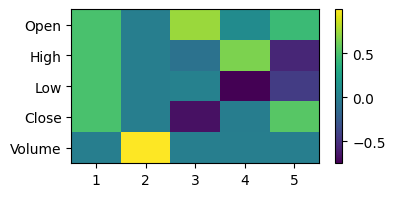

In [46]:
#Heatmap de componentes principales
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].columns)), 
           data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].columns)
plt.xticks(range(len(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

EVALUACION

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[7.99933815e-01 1.99992470e-01 4.63160141e-05 2.25623871e-05
 4.83616328e-06]


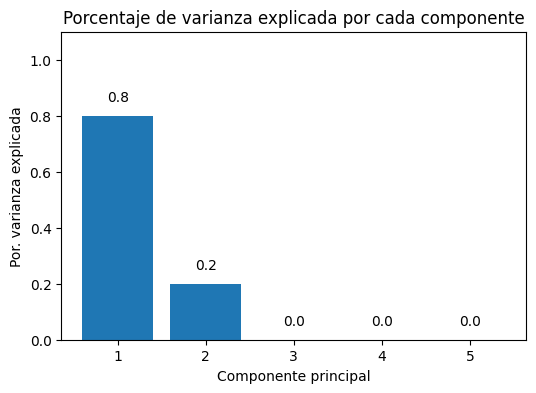

In [47]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.79993382 0.99992629 0.9999726  0.99999516 1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

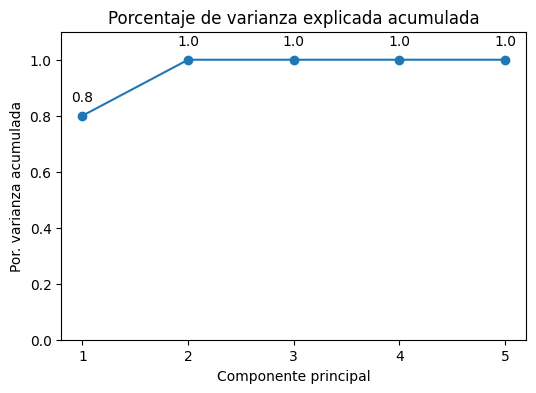

In [48]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

In [49]:
print(modelo_pca.explained_variance_ratio_)

[7.99933815e-01 1.99992470e-01 4.63160141e-05 2.25623871e-05
 4.83616328e-06]


In [50]:
print(modelo_pca.explained_variance_)

[4.00011088e+00 1.00007281e+00 2.31605651e-04 1.12824397e-04
 2.41834874e-05]


In [51]:
var_explicada = pd.DataFrame(modelo_pca.explained_variance_)
var_explicada.columns = ['var_explicada']
var_explicada = var_explicada.T
var_explicada.columns = ['PC1','PC2','PC3','PC4','PC5']

prop_var_explicada = pd.DataFrame(modelo_pca.explained_variance_ratio_)
prop_var_explicada.columns = ['prop_var_explicada']
prop_var_explicada = prop_var_explicada.T
prop_var_explicada.columns = ['PC1','PC2','PC3','PC4','PC5']

In [52]:
var_explicada

,PC1,PC2,PC3,PC4,PC5
var_explicada,4.000111,1.000073,0.000232,0.000113,0.000024


In [53]:
prop_var_explicada

,PC1,PC2,PC3,PC4,PC5
prop_var_explicada,0.799934,0.199992,0.000046,0.000023,0.000005


In [54]:
# Proyección de las observaciones de entrenamiento
componentes = pca_pipe.transform(X = data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']])

In [55]:
componentes = pd.DataFrame(componentes)

In [56]:
componentes.columns = ['PC1','PC2','PC3','PC4','PC5']

In [57]:
componentes.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.166945,0.132215,-0.000016,-0.000068,0.000003
1,-0.167390,0.257925,-0.000016,-0.000068,0.000003
2,-0.167108,0.178417,-0.000016,-0.000068,0.000003
3,-0.167523,0.295494,-0.000016,-0.000068,0.000003
4,-0.167081,0.170784,-0.000016,-0.000068,0.000003


In [58]:
componentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9054 entries, 0 to 9053
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     9054 non-null   float64
 1   PC2     9054 non-null   float64
 2   PC3     9054 non-null   float64
 3   PC4     9054 non-null   float64
 4   PC5     9054 non-null   float64
dtypes: float64(5)
memory usage: 353.8 KB


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9054 entries, 0 to 9053
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    9054 non-null   object 
 1   Date    9054 non-null   object 
 2   Open    9054 non-null   float64
 3   High    9054 non-null   float64
 4   Low     9054 non-null   float64
 5   Close   9054 non-null   float64
 6   Volume  9054 non-null   float64
dtypes: float64(5), object(2)
memory usage: 495.3+ KB


In [60]:
dataf = pd.concat([data.loc[:,['name']],componentes.loc[:,['PC1','PC2']]], axis = 1)

In [61]:
dataf.head()

,name,PC1,PC2
0,1000SATSUSDT.csv,-0.166945,0.132215
1,1000SATSUSDT.csv,-0.167390,0.257925
2,1000SATSUSDT.csv,-0.167108,0.178417
3,1000SATSUSDT.csv,-0.167523,0.295494
4,1000SATSUSDT.csv,-0.167081,0.170784


In [62]:
ss.spearmanr(dataf['PC1'],dataf['PC2'])

SignificanceResult(statistic=-0.3332393486428793, pvalue=1.0534860447744462e-233)

In [63]:
dataf.to_csv('dataf.csv', index = False)

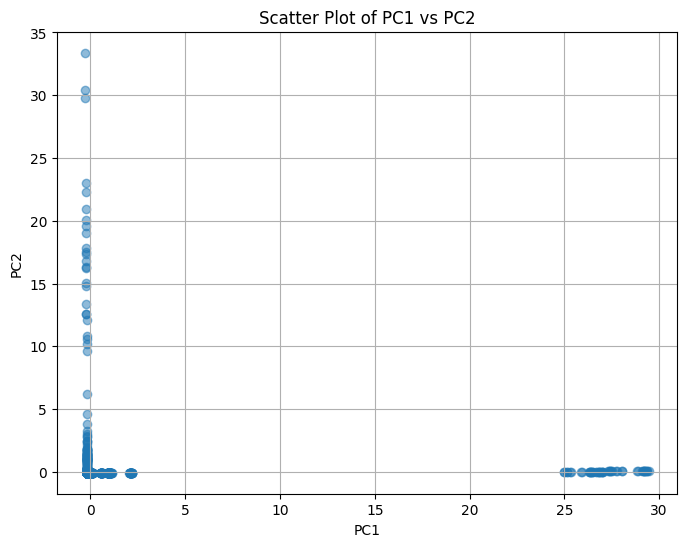

In [64]:
import matplotlib.pyplot as plt

df_pca = pd.read_csv('dataf.csv')

# Gráfico de dispersión de PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('Scatter Plot of PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


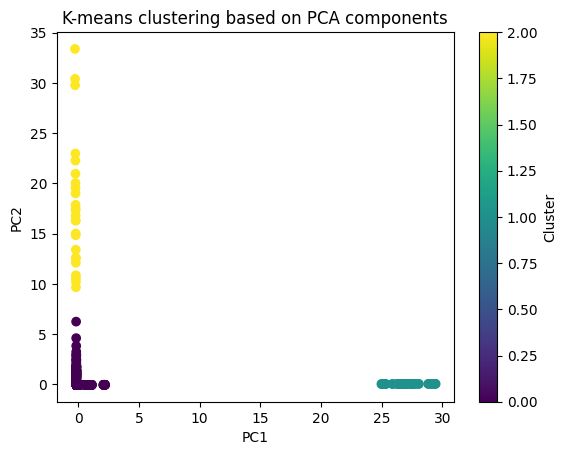

In [65]:
from sklearn.cluster import KMeans

# Suponiendo que df_pca contiene las columnas 'PC1' y 'PC2'
kmeans = KMeans(n_clusters=3)  # Cambia el número de clusters según lo que necesites
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

# Visualizar los clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('K-means clustering based on PCA components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


In [71]:
from sklearn.cluster import KMeans

# Aplicar K-means clustering
kmeans = KMeans(n_clusters=3)  # Cambia n_clusters a lo que creas apropiado
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

# Ahora 'Cluster' podría actuar como tus etiquetas
label_column = 'Cluster'


In [74]:
import pandas as pd
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv('New_data.csv')

# Print the column names to verify
print("Original DataFrame columns:", df.columns)

# Ensure the 'Close' column exists
if 'Open' not in df.columns:
    print("Column 'Open' does not exist in the DataFrame")
else:
    # Preprocess your data
    # Drop non-numeric columns
    df = df.select_dtypes(include=["number"])

    # Handle missing values (e.g., drop rows with missing values)
    df = df.dropna()

    # Apply PCA
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(df)

    df_pca = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])

    # Suponiendo que tienes datos de precios y quieres generar etiquetas
    df_pca['price_change'] = df['Open'].pct_change()  # Cambio porcentual diario

    # Crear una etiqueta basada en el cambio de precio
    df_pca['label_column'] = df_pca['price_change'].apply(lambda x: 'up' if x > 0 else 'down')

    # Print the column names to verify
    print("PCA DataFrame columns:", df_pca.columns)

    # Replace 'actual_label_column' with the real name of the label column
    label_column = 'label_column'

    # Ensure the label column exists
    if label_column not in df_pca.columns:
        print(f"Column '{label_column}' does not exist in df_pca")
    else:
        # Suponiendo que ya tienes etiquetas en 'label_column'
        X = df_pca[['PC1', 'PC2']]
        y = df_pca[label_column]

        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Inicializar el clasificador
        classifier = SVC()

        # Entrenar el clasificador
        classifier.fit(X_train, y_train)

        # Predicciones
        y_pred = classifier.predict(X_test)

        # Calcular la precisión
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy * 100:.2f}%')

Original DataFrame columns: Index(['name', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
PCA DataFrame columns: Index(['PC1', 'PC2', 'price_change', 'label_column'], dtype='object')
Accuracy: 55.44%
